<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/FileLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
hemo = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Hemodialysis.csv', encoding='latin1')

In [ ]:
lab = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Lab.csv')

In [ ]:
# Create a list from hemo['PatientUID']
patient_uid_list = hemo['PatientUID'].unique().tolist()
# Remove patient UIDs from lab['PatientUID'] that are not in the list
lab = lab[~lab['PatientUID'].isin(patient_uid_list)]
lab.shape

(17728574, 11)

In [ ]:
lab0 = pd.DataFrame(lab)

In [ ]:
lab_location = lab['Location'].value_counts().reset_index()
lab_location.columns = ['Location', 'Location_Count']

lab_result = lab['ResultItemName'].value_counts().reset_index()
lab_result.columns = ['ResultItemName', 'ResultItemName_Count']

lab_request = lab['RequestItemName'].value_counts().reset_index()
lab_request.columns = ['RequestItemName', 'RequestItemName_Count']

columns_to_count = ['Location', 'ResultItemName', 'RequestItemName']

# Count unique values in the specified columns
lab_count = lab[columns_to_count].value_counts().reset_index()
lab_count.columns = ['Location', 'ResultItemName', 'RequestItemName', 'Count']

LabSummaryDF = pd.DataFrame(lab_count)

In [43]:
lab.head()

,LabNo,PatientUID,PatientVisitUID,Location,RequestItemName,ResultItemName,CWhen,ResultDttm,ResultValue,Unit,ReferenceRange,LabelResult,LabelRequest,DuplicateIndex
1,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"ALBUMIN, 32403","ALBUMIN, 32403",2558-02-19 10:32:20.907,NaN,4.1,NaN,3.8 - 5.4,lab11,lab11,0
5,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"BUN, 32201",BUN,2558-02-19 10:32:20.140,NaN,9.5,mg%,5.8 - 19.1,lab2,lab2,1
6,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CALCIUM, 32106","CALCIUM, 32106",2558-02-19 10:32:21.717,NaN,9.4,NaN,8.4 - 10.2,lab9,lab9,2
7,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CHOLESTEROL, 32501","CHOLESTEROL, 32501",2558-02-19 10:32:20.343,NaN,190,NaN,127 - 262,lab21,lab21,3
8,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CREATININE, 32202","CREATININE, 32202",2558-02-19 10:32:20.233,NaN,0.9,NaN,0.5 - 1.5,lab3,lab3,4


# **Slope**


> **ค่า x = ค่าจากวิสิท t ที่มาก่อน**




In [ ]:
import pandas as pd
slope = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/Slope.xlsx')

In [ ]:
data = pd.DataFrame(slope)
data = data[['PatientUID','PatientVisitUID','Slopes']]

df = pd.DataFrame(data)

# Sorting the DataFrame by PatientUID and PatientVisitUID
df = df.sort_values(['PatientUID', 'PatientVisitUID'])

# Adding a NextSlope column
df['Slopes'] = df.groupby('PatientUID')['Slopes'].shift(-1)

data = df.dropna()
data

,PatientUID,PatientVisitUID,Slopes
0,2299,3386255,-7.158596
1,2299,4546471,5.550691
2,2299,5812902,-6.063710
3,2299,6947220,-12.812245
4,2299,8186767,28.287500
...,...,...,...
73378,3319961,9270330,-4.256753
73380,3319971,9270331,-0.692078
73382,3320048,9242721,7.217875
73384,3320050,9257281,-32.794557


# **LabList**


> **Replace Item with List then create new table to store the value**




In [ ]:
lab = pd.DataFrame(lab0) ##run from this cell if u want to rerun

In [ ]:
lab0.columns

Index(['LabNo', 'PatientUID', 'PatientVisitUID', 'Location', 'RequestItemName',
       'ResultItemName', 'CWhen', 'ResultDttm', 'ResultValue', 'Unit',
       'ReferenceRange'],
      dtype='object')

In [ ]:
# Define the mapping of LabSummaryDF indices to lab result DataFrames
lab_mapping = {
    'lab1': [1, 1587],
    'lab2': [3, 129, 185, 312],
    'lab3': [0, 103],
    'lab4': [5, 115],
    'lab5': [2, 112],
    'lab6': [6, 118],
    'lab7': [4, 117],
    'lab8': [63, 194],
    'lab9': [31, 172],
    'lab10': [33, 175],
    'lab11': [21, 137],
    'lab12': [22, 3001],
    'lab13': [8, 100, 1736, 2577, 2856, 2980],
    'lab14': [13],
    'lab15': [15],
    'lab16': [159],
    'lab17': [198, 238, 584],
    'lab18': [154],
    'lab19': [30, 156, 177, 223, 277, 561],
    'lab20': [49, 153],
    'lab21': [23, 114],
    'lab22': [50, 130],
    'lab23': [34, 126],
    'lab24': [51, 131],
    'lab25': [220, 304, 539, 2909],
    'lab26': [191, 253],
    'lab27': [163],
    'lab28': [108,397,73,305],
    'lab29': [176, 2796],
    'lab30': [218, 949],
    'lab31': [233, 1424],
    'lab32': [182, 473]
    # ... add more mappings as needed
}

In [161]:
LabSummaryDF.loc[[31, 172]]

,Location,ResultItemName,RequestItemName,Count
31,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CALCIUM, 32106",CALCIUM,172090
172,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CALCIUM, 32106","CALCIUM, 32106",7512


In [ ]:
# Create new columns for labels
lab['LabelResult'] = ""
lab['LabelRequest'] = ""

# Iterate through the lab_mapping dictionary and update 'LabelResult' and 'LabelRequest' columns
for lab_name, indices in lab_mapping.items():
    result_item_names = LabSummaryDF[LabSummaryDF.index.isin(indices)]['ResultItemName'].tolist()
    request_item_names = LabSummaryDF[LabSummaryDF.index.isin(indices)]['RequestItemName'].tolist()
    lab.loc[lab['ResultItemName'].isin(result_item_names), 'LabelResult'] = lab_name
    lab.loc[lab['RequestItemName'].isin(request_item_names), 'LabelRequest'] = lab_name

In [ ]:
lab = lab[['LabNo','PatientUID', 'PatientVisitUID','CWhen','ResultItemName','RequestItemName','ResultValue', 'LabelResult', 'LabelRequest']]

## **Define**

**กรณีคล้าย FileMedical**

```
มันจะมี rows ที่ mapping value ไม่ตรงกัน เช่น
```
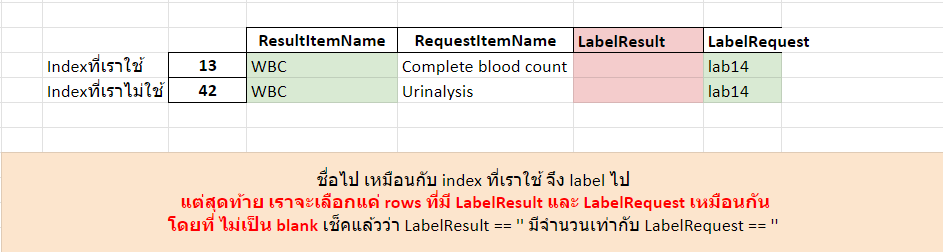


#### **Re-Check Mapping**

In [ ]:
lab0.loc[(lab0['LabelResult'] == 'lab1') & (lab0['LabelRequest'] == 'lab3'), 'LabelRequest'] = 'lab1' #L1:eGFR
lab0.loc[(lab0['LabelResult'] == 'lab12') & (lab0['LabelRequest'] == 'lab15'), 'LabelRequest'] = 'lab12' #L12:Hemoglobin
lab0.loc[(lab0['LabelResult'] == 'lab13') & (lab0['LabelRequest'] == 'lab15'), 'LabelRequest'] = 'lab13' #L13:HCT
lab0.loc[(lab0['LabelResult'] == 'lab14') & (lab0['LabelRequest'] == 'lab15'), 'LabelRequest'] = 'lab14' #L14:WBC

In [ ]:
LabSummaryDF.loc[[182, 473]]

,Location,ResultItemName,RequestItemName,Count
182,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"TOTAL PROTEIN IN URINE 24 HRS., 34104",TOTAL PROTEIN IN URINE 24 HRS.,7130
473,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"TOTAL PROTEIN IN URINE 24 HRS., 34104","TOTAL PROTEIN IN URINE 24 HRS., 34104",440


In [ ]:
#lab0.loc[(lab0['LabelResult'] == 'lab1') & (lab0['LabelRequest'] == 'lab1')] #remap >> 435224
#lab0.loc[(lab0['LabelResult'] == 'lab2') & (lab0['LabelRequest'] == 'lab2')] #checked >> 412742
#lab0.loc[(lab0['LabelResult'] == 'lab3') & (lab0['LabelRequest'] == 'lab3')] #checked >> 492979
#lab0.loc[(lab0['LabelResult'] == 'lab4') & (lab0['LabelRequest'] == 'lab4')] #checked >> 405920
#lab0.loc[(lab0['LabelResult'] == 'lab5') & (lab0['LabelRequest'] == 'lab5')] #checked >> 419305
#lab0.loc[(lab0['LabelResult'] == 'lab6') & (lab0['LabelRequest'] == 'lab6')] #checked >> 405185
#lab0.loc[(lab0['LabelResult'] == 'lab7') & (lab0['LabelRequest'] == 'lab7')] #checked >> 406077
#lab0.loc[(lab0['LabelResult'] == 'lab8') & (lab0['LabelRequest'] == 'lab8')] #checked >> 89115
#lab0.loc[(lab0['LabelResult'] == 'lab9') & (lab0['LabelRequest'] == 'lab9')] #checked >> 179602
#lab0.loc[(lab0['LabelResult'] == 'lab10') & (lab0['LabelRequest'] == 'lab10')] #checked >> 178485
#lab0.loc[(lab0['LabelResult'] == 'lab11') & (lab0['LabelRequest'] == 'lab11')] #checked >> 267516
#lab0.loc[(lab0['LabelResult'] == 'lab12') & (lab0['LabelRequest'] == 'lab12')] #remap >> Hb 248268
#lab0.loc[(lab0['LabelResult'] == 'lab13') & (lab0['LabelRequest'] == 'lab13')] #remap >> HCT 348514 rows
#lab14 >> 315233
#lab0.loc[(lab0['LabelResult'] == 'lab15') & (lab0['LabelRequest'] == 'lab15')] #checked >> 315226 rows
#lab0.loc[(lab0['LabelResult'] == 'lab16') & (lab0['LabelRequest'] == 'lab16')] #checked >> 10055 rows
#lab0.loc[(lab0['LabelResult'] == 'lab17') & (lab0['LabelRequest'] == 'lab17')] #checked >> 8860 rows
#lab0.loc[(lab0['LabelResult'] == 'lab18') & (lab0['LabelRequest'] != 'lab18')] checked >> 10974 rows
#lab0.loc[(lab0['LabelResult'] == 'lab19') & (lab0['LabelRequest'] != 'lab19')] checked >> 197363 rows
#lab0.loc[(lab0['LabelResult'] == 'lab20') & (lab0['LabelRequest'] != 'lab20')] checked >> 157990  rows
#lab0.loc[(lab0['LabelResult'] == 'lab21') & (lab0['LabelRequest'] != 'lab21')] checked >> 261543 rows
#lab0.loc[(lab0['LabelResult'] == 'lab22') & (lab0['LabelRequest'] != 'lab22')] checked >> 161410 rows
#lab0.loc[(lab0['LabelResult'] == 'lab23') & (lab0['LabelRequest'] != 'lab23')] checked >> 181613 rows
#lab0.loc[(lab0['LabelResult'] == 'lab24') & (lab0['LabelRequest'] != 'lab24')] checked >> 158028 rows
#lab0.loc[(lab0['LabelResult'] == 'lab25') & (lab0['LabelRequest'] != 'lab25')] checked >> 6090 rows
#lab0.loc[(lab0['LabelResult'] == 'lab26') & (lab0['LabelRequest'] != 'lab26')] checked >> 8813 rows
#lab0.loc[(lab0['LabelResult'] == 'lab27') & (lab0['LabelRequest'] != 'lab27')] checked >> 9406  rows
#lab 28 >> 70044
#lab0.loc[(lab0['LabelResult'] == 'lab29') & (lab0['LabelRequest'] != 'lab29')] checked >> 24 hr urine volume >> 7424 rows
#lab0.loc[(lab0['LabelResult'] == 'lab30') & (lab0['LabelRequest'] != 'lab30')] checked >> 24 hr urine urea >> 4191 rows
#lab0.loc[(lab0['LabelResult'] == 'lab31') & (lab0['LabelRequest'] != 'lab31')] #checked >> 24 hr urine sodium >> 3338 rows
#lab0.loc[(lab0['LabelResult'] == 'lab32') & (lab0['LabelRequest'] == 'lab32')].shape #checked >> 24 hr urine protein >> 7570 rows

In [ ]:
#ค่าพวกนี้เป็นค่าที่ไม่ตรงกับ index ที่หมอกำหนด ก็เลยไม่ได้ใช้ในตอนแรก 5551493  rows
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab3')] >> FileLab 1087
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab13')] >> BloodGas(POCT)
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab15')] >> Complete blood count
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab17')] >> FileLab 586
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab18')] >> FileLab 1835
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab26')] >> FileLab 1120
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab27')] >> FileLab 2111
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab29')] >> FileLab 2100

`ทำต่อเหมือนเดิม โดยหลังจากแก้ไขค่าที่ map ไม่ตรงแล้ว เลือกคอลัมน์ที่ค่าที่ map จาก focus column ตรงกันทั้ง 2 คอลัมน์ มาใช้`

In [ ]:
lab0 = lab0[(lab0['LabelResult'] != '') & (lab0['LabelRequest'] != '')]

In [ ]:
lab = lab0[(lab0['LabelResult'] == lab0['LabelRequest'])]

In [ ]:
lab.shape

(6184103, 13)

In [ ]:
lab.head()

,LabNo,PatientUID,PatientVisitUID,Location,RequestItemName,ResultItemName,CWhen,ResultDttm,ResultValue,Unit,ReferenceRange,LabelResult,LabelRequest,DuplicateIndex
1,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"ALBUMIN, 32403","ALBUMIN, 32403",2558-02-19 10:32:20.907,NaN,4.1,NaN,3.8 - 5.4,lab11,lab11,0
5,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"BUN, 32201",BUN,2558-02-19 10:32:20.140,NaN,9.5,mg%,5.8 - 19.1,lab2,lab2,1
6,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CALCIUM, 32106","CALCIUM, 32106",2558-02-19 10:32:21.717,NaN,9.4,NaN,8.4 - 10.2,lab9,lab9,2
7,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CHOLESTEROL, 32501","CHOLESTEROL, 32501",2558-02-19 10:32:20.343,NaN,190,NaN,127 - 262,lab21,lab21,3
8,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CREATININE, 32202","CREATININE, 32202",2558-02-19 10:32:20.233,NaN,0.9,NaN,0.5 - 1.5,lab3,lab3,4


# **WideTableLab**


In [38]:
import numpy as np

# Step 1: Add an additional column to distinguish duplicate entries
lab['DuplicateIndex'] = lab.groupby(['PatientUID', 'PatientVisitUID']).cumcount()

# Step 2: Pivot the 'lab' DataFrame
lab_pivoted = lab.pivot(index=['PatientUID', 'PatientVisitUID', 'DuplicateIndex'], columns='LabelResult', values='ResultValue')

<ipython-input-38-ee5542d7d8e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab['DuplicateIndex'] = lab.groupby(['PatientUID', 'PatientVisitUID']).cumcount()


In [39]:
# Step 3: Reset the index to match the desired format
lab_pivoted = lab_pivoted.reset_index()

# Step 4: Fill NaN values with None using numpy.nan
lab_pivoted = lab_pivoted.where(pd.notna(lab_pivoted), np.nan)

# Step 5: Merge 'CWhen' from 'lab' into the pivoted DataFrame
result = pd.merge(data, lab_pivoted, on=['PatientUID', 'PatientVisitUID'], how='left')


In [40]:
result

,PatientUID,PatientVisitUID,Slopes,DuplicateIndex,lab1,lab10,lab11,lab12,lab13,lab14,...,lab3,lab30,lab31,lab32,lab4,lab5,lab6,lab7,lab8,lab9
0,2299,3386255,-7.158596,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2299,3386255,-7.158596,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2299,3386255,-7.158596,2,NaN,NaN,NaN,NaN,NaN,NaN,...,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2299,3386255,-7.158596,3,71.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2299,3386255,-7.158596,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865474,3321289,9274735,-36.776371,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.3,NaN,NaN,NaN,NaN
865475,3321289,9274735,-36.776371,8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,130,NaN,NaN,NaN,NaN,NaN
865476,3321289,9274735,-36.776371,9,NaN,NaN,NaN,NaN,31.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865477,3321289,9274735,-36.776371,10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> **Null CWhen Problem**


```
    คนไข้ 1 คน มี visit เดียวกัน แต่มาตรวจคนละแลป
    ลงเวลาการตรวจแต่ละแลปไม่ตรงกัน
    เมื่อเราทำ WhideTable ส่งผลให้ CWhen เป็น missing
    เพราะค่าการตรวจแต่ละแลปนำมาจากวันเวลาคนละอันกัน
    
```

## **Duplicate Rows**


In [ ]:
result[result.duplicated(subset=['PatientVisitUID'], keep=False)]

### **apply**


```
cell นี้ ใช้เวลารันนานมาก
แต่ มันไม่มีหนทางอื่นแล้ว หรืออาจจะมี แต่ไม่คิดแล้ว!!!
```




In [41]:
import pandas as pd
from datetime import datetime, timedelta

# Sort the DataFrame by 'PatientVisitUID' and 'DuplicateIndex'
result.sort_values(by=['PatientVisitUID', 'DuplicateIndex'], ascending=[True, True], inplace=True)

# Define a custom function to fill null values with the latest non-null values within the same 'PatientVisitUID'
def fill_null_with_latest(group):
    for col in range(1, 33):  # Assuming columns 'lab1' through 'lab32'
        col_name = f'lab{col}'
        group[col_name] = group[col_name].fillna(method='ffill').fillna(method='bfill')
    return group.tail(1)

# Apply the custom function to each 'PatientVisitUID' group
result = result.groupby('PatientVisitUID').apply(fill_null_with_latest).reset_index(drop=True)

In [56]:
result.sort_values(by=['PatientUID', 'PatientVisitUID'], inplace=True)

In [57]:
result

,PatientUID,PatientVisitUID,Slopes,DuplicateIndex,lab1,lab10,lab11,lab12,lab13,lab14,...,lab3,lab30,lab31,lab32,lab4,lab5,lab6,lab7,lab8,lab9
1376,2299,3386255,-7.158596,7,71.7,NaN,NaN,NaN,NaN,NaN,...,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12545,2299,4546471,5.550691,8,63.60,NaN,NaN,NaN,NaN,NaN,...,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,NaN
24173,2299,5812902,-6.063710,16,70.20,NaN,NaN,10.1,32.4,9.41,...,0.82,NaN,NaN,NaN,143,3.8,103,29.7,NaN,NaN
33845,2299,6947220,-12.812245,7,64.02,NaN,NaN,NaN,NaN,NaN,...,0.88,NaN,NaN,NaN,NaN,4.3,NaN,NaN,NaN,NaN
45182,2299,8186767,28.287500,16,48.54,NaN,NaN,10.7,34.6,5.42,...,1.10,NaN,NaN,NaN,141,4.4,102,27.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52503,3319961,9270330,-4.256753,20,38.17,3.9,5.0,NaN,42.1,10.32,...,1.85,NaN,NaN,NaN,142,4.2,101,24.1,NaN,9.8
52504,3319971,9270331,-0.692078,20,27.20,4.3,4.3,NaN,40.6,9.56,...,1.85,NaN,NaN,NaN,142,4.4,103,23.7,NaN,9.2
52429,3320048,9242721,7.217875,20,62.45,3.4,3.1,NaN,35,4.61,...,1.21,NaN,NaN,NaN,132,4.3,101,18.8,NaN,8.5
52473,3320050,9257281,-32.794557,9,66.18,NaN,NaN,NaN,39.0,9.44,...,1.14,NaN,NaN,NaN,138,4.9,101,25.6,NaN,NaN


In [45]:
result.isnull().sum()

PatientUID             0
PatientVisitUID        0
Slopes                 0
DuplicateIndex         0
lab1                   0
lab10              40778
lab11              29908
lab12              23610
lab13              22308
lab14              22312
lab15              22312
lab16              51732
lab17              51845
lab18              51643
lab19              23300
lab2               12839
lab20              27983
lab21              18971
lab22              26203
lab23              23395
lab24              26625
lab25              51723
lab26              51348
lab27              51269
lab28              47134
lab29              51919
lab3                   0
lab30              52223
lab31              52336
lab32              51957
lab4               21278
lab5               19012
lab6               21359
lab7               21199
lab8               38898
lab9               40443
dtype: int64

In [46]:
result[result['PatientVisitUID']==2705230][['lab1',
       'lab10', 'lab11', 'lab12', 'lab13', 'lab14', 'lab15', 'lab16', 'lab17',
       'lab18', 'lab19', 'lab2', 'lab20', 'lab21', 'lab22', 'lab23', 'lab24',
       'lab25', 'lab26', 'lab27', 'lab28', 'lab29', 'lab3', 'lab30', 'lab31',
       'lab32', 'lab4', 'lab5', 'lab6', 'lab7', 'lab8', 'lab9']]

,lab1,lab10,lab11,lab12,lab13,lab14,lab15,lab16,lab17,lab18,...,lab3,lab30,lab31,lab32,lab4,lab5,lab6,lab7,lab8,lab9
0,41.9,3.6,3.8,10.8,34.5,4.28,142,NaN,NaN,NaN,...,1.2,9.1,NaN,165,141,3.5,106,20.7,2.4,8.8


In [47]:
lab_pivoted[lab_pivoted['PatientVisitUID']==2705230]

LabelResult,PatientUID,PatientVisitUID,DuplicateIndex,lab1,lab10,lab11,lab12,lab13,lab14,lab15,...,lab3,lab30,lab31,lab32,lab4,lab5,lab6,lab7,lab8,lab9
738637,136689,2705230,0,NaN,NaN,3.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
738638,136689,2705230,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.4,NaN,NaN
738639,136689,2705230,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
738640,136689,2705230,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3
738641,136689,2705230,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739473,136689,2705230,836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,139,NaN,NaN,NaN,NaN,NaN
739474,136689,2705230,837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.7,NaN,NaN
739475,136689,2705230,838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,106,NaN,NaN,NaN
739476,136689,2705230,839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN


In [ ]:
lab[lab['PatientVisitUID']==2705230]

,LabNo,PatientUID,PatientVisitUID,Location,RequestItemName,ResultItemName,CWhen,ResultDttm,ResultValue,Unit,ReferenceRange,LabelResult,LabelRequest,DuplicateIndex
1637901,1,136689,2705230,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,ALBUMIN,"ALBUMIN, 32403",2558-11-22 18:51:24.787,NaN,3.9,g/dL,3.8 - 5.4,lab11,lab11,0
1637907,1,136689,2705230,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,BICARBONATE,"BICARBONATE, 32105",2558-11-22 18:51:25.940,NaN,27.4,mEq/L,20.6 - 28.3,lab7,lab7,1
1637908,1,136689,2705230,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,BUN,"BUN, 32201",2558-11-22 18:51:24.360,NaN,7.2,mg/dL,5.8 - 19.1,lab2,lab2,2
1637909,1,136689,2705230,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CALCIUM,"CALCIUM, 32106",2558-11-22 18:51:26.077,NaN,9.3,mg/dL,8.4 - 10.2,lab9,lab9,3
1637910,1,136689,2705230,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CHLORIDE,"CHLORIDE, 32104",2558-11-22 18:51:25.810,NaN,99,mEq/L,96 - 107,lab6,lab6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21552326,79,136689,2705230,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,SODIUM,"SODIUM, 32102",2559-08-08 08:03:53.050,NaN,139,mEq/L,130 - 147,lab4,lab4,836
21554943,80,136689,2705230,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,BICARBONATE,"BICARBONATE, 32105",2559-08-15 07:54:58.773,NaN,20.7,mEq/L,20.6 - 28.3,lab7,lab7,837
21554944,80,136689,2705230,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CHLORIDE,"CHLORIDE, 32104",2559-08-15 07:54:58.680,NaN,106,mEq/L,96 - 107,lab6,lab6,838
21554945,80,136689,2705230,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,POTASSIUM,"POTASSIUM, 32103",2559-08-15 07:54:58.593,NaN,3.5,mEq/L,3.4 - 4.7,lab5,lab5,839


In [ ]:
import pandas as pd
import numpy as np

# Create a boolean mask for null values in the pivoted lab DataFrame
lab_pivoted_null_mask = lab_pivoted.isna()

# Iterate through each row and column to check for discrepancies
for index, row in result.iterrows():
    patient_uid = row['PatientUID']
    visit_uid = row['PatientVisitUID']
    duplicate_index = row['DuplicateIndex']

    # Select the corresponding row from the pivoted lab DataFrame
    lab_pivoted_row = lab_pivoted[(lab_pivoted['PatientUID'] == patient_uid) &
                                  (lab_pivoted['PatientVisitUID'] == visit_uid) &
                                  (lab_pivoted['DuplicateIndex'] == duplicate_index)]

    # Iterate through each column in the pivoted lab row
    for col in lab_pivoted.columns:
        if pd.notna(row[col]):  # If the value in the result table is not null
            lab_pivoted_value = lab_pivoted_row[col].iloc[0] if not lab_pivoted_row.empty else np.nan
            if pd.notna(lab_pivoted_value) and row[col] != lab_pivoted_value:  # If there is a mismatch
                print(f"Mismatch in {col} for PatientVisitUID {visit_uid}, DuplicateIndex {duplicate_index}")


In [ ]:
result.isnull().sum()

PatientUID             0
PatientVisitUID        0
Slopes                 0
DuplicateIndex         0
lab1                   0
lab10              40778
lab11              29908
lab12              23610
lab13              22308
lab14              22312
lab15              22312
lab16              51732
lab17              51845
lab18              51643
lab19              23300
lab2               12839
lab20              27983
lab21              18971
lab22              26203
lab23              23395
lab24              26625
lab25              51723
lab26              51348
lab27              51269
lab28              47134
lab29              51919
lab3                   0
lab30              52223
lab31              52336
lab32              51957
lab4               21278
lab5               19012
lab6               21359
lab7               21199
lab8               38898
lab9               40443
dtype: int64

### **Check**

In [ ]:
labDF = result[['PatientUID','PatientVisitUID','Slopes','lab2', 'lab3',
                      'lab4', 'lab5', 'lab6', 'lab7', 'lab8', 'lab9', 'lab10', 'lab11',
                      'lab12', 'lab13', 'lab15', 'lab16', 'lab17', 'lab18',
                      'lab19', 'lab20', 'lab21', 'lab22', 'lab23', 'lab24', 'lab25', 'lab26',
                      'lab27', 'lab28', 'lab29', 'lab30', 'lab31', 'lab32','lab1', 'lab14']]
# Drop rows with missing values in 'PatientUID', 'PatientVisitUID', and 'Slopes'
labDF = labDF.dropna(subset=['PatientUID', 'PatientVisitUID', 'Slopes'])

## **Rename Columns**

In [ ]:
# Create a dictionary for renaming columns
column_rename_dict = {
    'lab1': 'L1:eGFR',
    'lab2': 'L2:BUN',
    'lab3': 'L3:Creatinine',
    'lab4': 'L4:Sodium',
    'lab5': 'L5:Potassium',
    'lab6': 'L6:Chloride',
    'lab7': 'L7:Bicarbonate',
    'lab8': 'L8:Uric',
    'lab9': 'L9:Calcium',
    'lab10': 'L10:Phosphorus',
    'lab11': 'L11:Albumin',
    'lab12': 'L12:Hemoglobin',
    'lab13': 'L13:Hematocrit',
    'lab14': 'L14:WBC',
    'lab15': 'L15:Platelet',
    'lab16': 'L16:TIBC',
    'lab17': 'L17:Tranferin SAT',
    'lab18': 'L18:Ferritin',
    'lab19': 'L19:Blood sugar',
    'lab20': 'L20:HbA1c',
    'lab21': 'L21:Cholesterol',
    'lab22': 'L22:Triglyceride',
    'lab23': 'L23:LDL Cholesterol',
    'lab24': 'L24:HDL Cholesterol',
    'lab25': 'L25:Parathyroid hormone',
    'lab26': 'L26:Vitamin D',
    'lab27': 'L27:UrineAlbumin/Cr ratio',
    'lab28': 'L28:UrineProtein/Cr ratio',
    'lab29': 'L29:UrineVolume (24hrs)',
    'lab30': 'L30:UrineUrea (24hrs)',
    'lab31': 'L31:UrineSodium (24hrs)',
    'lab32': 'L32:UrineProtein (24hrs)'
}
# Use the rename method to rename the columns
labDF.rename(columns=column_rename_dict, inplace=True)
labDF

In [ ]:
labDF = labDF.sort_values(by=["PatientUID", "PatientVisitUID"])

> **Check dup**

In [ ]:
# Check for duplicate rows in data
duplicates_data = data[data.duplicated(['PatientUID', 'PatientVisitUID'], keep=False)]

# Check for duplicate rows in vitalDF
duplicates_vitalDF = labDF[labDF.duplicated(['PatientUID', 'PatientVisitUID', 'Slopes'], keep=False)]


In [ ]:
duplicates_vitalDF

In [ ]:
labDF

In [ ]:
labDF.to_excel('labDF.xlsx')